---
# <div align="center">**BIG TEST**</div>  
---  

<br>

---
# <div align="center">**THI·∫æT L·∫¨P D·ª∞ √ÅN**</div>  
---  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, TargetEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)               # Hi·ªÉn th·ªã ƒë·∫ßy ƒë·ªß b·∫£ng v·ªõi thanh tr∆∞·ª£t ngang
pd.set_option('display.float_format', '{:,.4f}'.format)  # L√†m tr√≤n s·ªë hi·ªÉn th·ªã ·ªü d·∫°ng 4 th·∫≠p ph√¢n cho g·ªçn

In [3]:
# Excel g·ªëc b·ªã tr·ªëng d√≤ng ƒë·∫ßu ti√™n, l·∫•y d√≤ng 2 v√† 3 l√†m header
data_raw = pd.read_excel("D:/FOX AI/Project Info/KPI/KPI 2024.xlsx", header=[1,2])

In [4]:
# T·∫°o c·ªôt m·ªõi bao g·ªìm c√°c header mu·ªën thay - d·∫°ng list (ƒê·ªëi chi·∫øu v·ªõi file excel cho d·ªÖ nh√¨n)
new_header = ['Th√°ng', 'CIF CBNV', 'H·ªç T√™n', 
              'M√£ ƒêVKD', 'Khu v·ª±c', 'ƒê∆°n v·ªã', 'Ch·ª©c danh', 'M√£ ch·ª©c danh',     
              'Ng√†y v√†o l√†m vi·ªác', 'Gi·ªõi t√≠nh', 'NƒÉm sinh',                   
              'Book Huy ƒë·ªông', 'Book Cho vay', 'Net Huy ƒë·ªông', 'Net Cho vay',
              'ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n',
              'ƒêi·ªÉm Net Hƒê', 'ƒêi·ªÉm Net CV', 
              'SL KH',
              'KPI_CN Book Value', 'KPI_CN Net Value', 'KPI_CN ƒêi·ªÉm DV', 'KPI_CN CLTD/DV',
              'KPI_BP Book Value', 'KPI_BP Net Value', 'KPI_BP ƒêi·ªÉm DV', 'KPI_BP CLTD/DV',
              'T·ªïng ƒëi·ªÉm CN', 'T·ªïng ƒëi·ªÉm BP', 
              'ƒêi·ªÉm KH CN', 'ƒêi·ªÉm KH BP', 
              'T·ª∑ tr·ªçng KPI_CN', 'T·ª∑ tr·ªçng KPI_BP',
              'ƒêi·ªÉm C·ªông/Tr·ª´ CN', 
              '% KPI_CN', '% KPI_BP', '% KPI cu·ªëi c√πng', 
              'Thu nh·∫≠p Gross'
             ]

# Ghi ƒë√® c·ªôt Header m·ªõi ƒë·ªß 41 bi·∫øn thay cho Header 1 v√† 2 MultiIndex, t·∫°o th√†nh dataframe 
data_raw.columns = new_header

# ƒê·ªïi t√™n ƒë·ªÉ l∆∞u tr·ªØ
df_renamed = data_raw

# Ki·ªÉm tra 
display(df_renamed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Th√°ng                          14074 non-null  float64       
 1   CIF CBNV                       14074 non-null  object        
 2   H·ªç T√™n                         14074 non-null  object        
 3   M√£ ƒêVKD                        14074 non-null  int64         
 4   Khu v·ª±c                        14074 non-null  object        
 5   ƒê∆°n v·ªã                         14074 non-null  object        
 6   Ch·ª©c danh                      14074 non-null  object        
 7   M√£ ch·ª©c danh                   14074 non-null  object        
 8   Ng√†y v√†o l√†m vi·ªác              14074 non-null  datetime64[ns]
 9   Gi·ªõi t√≠nh                      14074 non-null  object        
 10  NƒÉm sinh                       14074 non-null  int64    

None

In [5]:
# Ki·ªÉm tra 2
display(df_renamed.head(3))

Th√°ng   CIF CBNV               H·ªç T√™n  M√£ ƒêVKD Khu v·ª±c        ƒê∆°n v·ªã  \
0 2,024.0400  000013897   DANG NGOC XUAN ANH       25     KV6    CN ƒê·∫ÆK L·∫ÆK   
1 2,024.0400  000254297  NGUYEN THI THI DIEM       22     KV3  CN ƒê·ªíNG TH√ÅP   
2 2,024.0400  000660698     PHAN VAN VAN LOI       27     KV8     CN H√Ä N·ªòI   

                     Ch·ª©c danh M√£ ch·ª©c danh Ng√†y v√†o l√†m vi·ªác Gi·ªõi t√≠nh  \
0  Gi√°m ƒë·ªëc D·ªãch v·ª• kh√°ch h√†ng     CQL DVKH        2008-06-17        N·ªØ   
1  Gi√°m ƒë·ªëc D·ªãch v·ª• kh√°ch h√†ng     CQL DVKH        2010-12-15        N·ªØ   
2  Gi√°m ƒë·ªëc D·ªãch v·ª• kh√°ch h√†ng     CQL DVKH        2008-02-01       Nam   

   NƒÉm sinh       Book Huy ƒë·ªông     Book Cho vay        Net Huy ƒë·ªông  \
0      1983 68,382,348,762.0000 853,800,000.0000  3,127,777,986.3333   
1      1988 68,382,348,762.0000 853,800,000.0000  3,127,777,986.3333   
2      1977 48,507,770,815.0000   3,221,763.9000 39,407,406,889.8000   

        Net Cho vay  ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n  \
0 -385,670,000.0000                      56.2000   
1 -385,670,000.0000                      56.2000   
2      220,561.3500                      39.8700   

   ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n  ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n  \
0                        55.0760                       1.1240   
1                        55.0760                       1.1240   
2                        39.0726                       0.7974   

   ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n  ƒêi·ªÉm Net Hƒê  ƒêi·ªÉm Net CV  SL KH  KPI_CN Book Value  \
0                  1.7500       2.5653      -0.7925     20            29.0400   
1                  1.7500       2.5653      -0.7925    548            57.9500   
2                  0.0100      31.7709       0.0005     55            39.8800   

   KPI_CN Net Value  KPI_CN ƒêi·ªÉm DV  KPI_CN CLTD/DV  KPI_BP Book Value  \
0            0.6362          2.9273         -5.0000           294.9600   
1            1.7728          7.7000          0.0000           182.4400   
2           31.7713          2.3000          0.0000         1,503.1300   

   KPI_BP Net Value  KPI_BP ƒêi·ªÉm DV  KPI_BP CLTD/DV  T·ªïng ƒëi·ªÉm CN  \
0            7.2325         16.7384        -30.0000       27.6035   
1            1.5443         16.1250          0.0000       67.4228   
2          147.4506        152.3307          0.0000       73.9513   

   T·ªïng ƒëi·ªÉm BP  ƒêi·ªÉm KH CN  ƒêi·ªÉm KH BP  T·ª∑ tr·ªçng KPI_CN  T·ª∑ tr·ªçng KPI_BP  \
0      288.9309    131.3333    413.1667           0.6000           0.4000   
1      200.1093    131.3333    589.0833           0.6000           0.4000   
2    1,802.9114    131.3333    690.8333           0.6000           0.4000   

   ƒêi·ªÉm C·ªông/Tr·ª´ CN  % KPI_CN  % KPI_BP  % KPI cu·ªëi c√πng  Thu nh·∫≠p Gross  
0               NaN    0.2102    0.6993           0.4058 20,523,350.0000  
1               NaN    0.5134    0.3397           0.4439 20,523,350.0000  
2               NaN    0.5631    1.5000           0.9378 26,886,939.0000

---
# <div align="center">**TI·ªÄN X·ª¨ L√ç D·ªÆ LI·ªÜU**</div>   
---

In [6]:
"""
0. Th√°ng                          Th·ªùi ƒëi·ªÉm d√≤ng d·ªØ li·ªáu ƒë∆∞·ª£c ghi nh·∫≠n v√†o h·ªá th·ªëng 
1. CIF CBNV                       M√£ ID ƒë·ªôc l·∫≠p cho t·ª´ng ng∆∞·ªùi, d√πng ƒë·ªÉ truy v·∫•n n·∫øu c·∫ßn
2. H·ªç T√™n
3. M√£ ƒêVKD             
4. Khu v·ª±c             
5. ƒê∆°n v·ªã             
6. Ch·ª©c danh           
7. M√£ ch·ª©c danh
8. Ng√†y v√†o l√†m vi·ªác
9. Gi·ªõi t√≠nh
10. NƒÉm sinh
11. Book Huy ƒê·ªông                 T·ªïng s·ªë ti·ªÅn huy ƒë·ªông ƒë∆∞·ª£c t·ª´ kh√°ch h√†ng     (ti·ªÅn g·ª≠i, ti·∫øt ki·ªám, ƒë·∫ßu t∆∞)       >> Hi·ªáu su·∫•t Thu h√∫t v·ªën
12. Book Cho Vay                  T·ªïng s·ªë ti·ªÅn ƒë√£ gi·∫£i ng√¢n cho kh√°ch h√†ng vay                                     >> Hi·ªáu su·∫•t Cho vay
13. Net Huy ƒê·ªông V·ªën              = Book Huy ƒê·ªông V·ªën - S·ªë ti·ªÅn kh√°ch r√∫t ra   (M·ª©c tƒÉng tr∆∞·ªüng c·ªßa HƒêV)           >> Hi·ªáu su·∫•t thu h√∫t ti·ªÅn g·ª´i
14. Net Cho Vay                   = Book Cho Vay - S·ªë ti·ªÅn kh√°ch tr·∫£ n·ª£        (M·ª©c tƒÉng tr∆∞·ªüng c·ªßa D∆∞ n·ª£ cho vay) >> Hi·ªáu su·∫•t t√≠n d·ª•ng
15. ƒêi·ªÉm Book T·ªïng Hƒê ch∆∞a ch·∫∑n   = f0(Book Hƒê k·ª≥ h·∫°n, Hƒê CASA, Hƒê kh√°c...)    (C√°ch t√≠nh t√πy theo ng√¢n h√†ng, h√†m ƒë√£ b·ªã ·∫©n ƒëi
16. ƒêi·ªÉm Book Hƒê k·ª≥ h·∫°n ch∆∞a ch·∫∑n = f1(Book Hƒê k·ª≥ h·∫°n)                          C√°ch t√≠nh t∆∞∆°ng t·ª±, ch·ªâ kh√°c h√†m: chia m·ª©c chu·∫©n, nh√¢n h·ªá s·ªë,....) 
17. ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n   = f2(Book Hƒê CASA)                                         
18. ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n        = f3(Book CV)
19. ƒêi·ªÉm Net Hƒê                   = f4(Net Hƒê)
20. ƒêi·ªÉm Net CV                   = f5(Net CV)
21. SL KH
22. KPI_CN Book Value             = g0(Book Hƒê, Book CV)                        V·∫´n t∆∞∆°ng t·ª±, h√†m ƒë√£ b·ªã ·∫©n ƒëi:
23. KPI_CN Net Value              = g1(Net Hƒê, Net Value)                                     Th√™m ch·∫∑n, thay tr·ªçng s·ªë,... 
24. KPI_CN ƒêi·ªÉm DV                ƒêi·ªÉm D∆∞ V·ªën /// ƒêi·ªÉm D·ªãch v·ª• ???????????                                   
25. KPI_CN CLTD/DV                Cho L√£i T√≠n D·ª•ng / DV
26. KPI_BP Book Value                                                           V·∫´n t∆∞∆°ng t·ª±, h√†m kh√°c n·ªØa b·ªã ·∫©n ƒëi:
27. KPI_BP Net Value                                                                          Chia cho t·ªïng n√†o ƒë√≥ c·ªßa b·ªô ph·∫≠n, thay tr·ªçng s·ªë,...    
28. KPI_BP ƒêi·ªÉm DV                
29. KPI_BP CLTD/DV                       
30. T·ªïng ƒëi·ªÉm CN                  = SUM(22 23 24 25)
31. T·ªïng ƒëi·ªÉm BP                  = SUM(26 27 28 29)      
32. ƒêi·ªÉm KH CN                    ƒêi·ªÉm K·∫ø ho·∫°ch C√° nh√¢n
33. ƒêi·ªÉm KH BP                    ƒêi·ªÉm K·∫ø ho·∫°ch B·ªô ph·∫≠n
34. T·ª∑ tr·ªçng KPI_CN                    T·ª∑ tr·ªçng c·ªôt 34 35 ƒë·ªÉ nh√¢n v·ªõi c·ªôt 37 38 ra c·ªôt 39        
35. T·ª∑ tr·ªçng KPI_BP                    V√≠ d·ª•: GDV t·ª∑ tr·ªçng 1 - 0; C√†ng c·∫•p cao nh∆∞ Gƒê, KSV th√¨ t·ª∑ tr·ªçng 0.2 - 0.8 (ch√≠nh s√°ch ng√¢n h√†ng t√πy th√°ng)
36. ƒêi·ªÉm C·ªông/Tr·ª´ CN              C·ªông v√†o c·ªôt 30 ???
37. % KPI_CN                      = 30 / 32
38. % KPI_BP                      = 31 / 33 
39. % KPI cu·ªëi c√πng               = 30 * 37 + 35 * 38
40. Thu nh·∫≠p Gross                Thu nh·∫≠p tr∆∞·ªõc khi tr·ª´ ƒëi c√°c kho·∫£n chi ph√≠, thu·∫ø, b·∫£o hi·ªÉm, v.v kh√°c
"""

'\n0. Th√°ng                          Th·ªùi ƒëi·ªÉm d√≤ng d·ªØ li·ªáu ƒë∆∞·ª£c ghi nh·∫≠n v√†o h·ªá th·ªëng \n1. CIF CBNV                       M√£ ID ƒë·ªôc l·∫≠p cho t·ª´ng ng∆∞·ªùi, d√πng ƒë·ªÉ truy v·∫•n n·∫øu c·∫ßn\n2. H·ªç T√™n\n3. M√£ ƒêVKD             \n4. Khu v·ª±c             \n5. ƒê∆°n v·ªã             \n6. Ch·ª©c danh           \n7. M√£ ch·ª©c danh\n8. Ng√†y v√†o l√†m vi·ªác\n9. Gi·ªõi t√≠nh\n10. NƒÉm sinh\n11. Book Huy ƒê·ªông                 T·ªïng s·ªë ti·ªÅn huy ƒë·ªông ƒë∆∞·ª£c t·ª´ kh√°ch h√†ng     (ti·ªÅn g·ª≠i, ti·∫øt ki·ªám, ƒë·∫ßu t∆∞)       >> Hi·ªáu su·∫•t Thu h√∫t v·ªën\n12. Book Cho Vay                  T·ªïng s·ªë ti·ªÅn ƒë√£ gi·∫£i ng√¢n cho kh√°ch h√†ng vay                                     >> Hi·ªáu su·∫•t Cho vay\n13. Net Huy ƒê·ªông V·ªën              = Book Huy ƒê·ªông V·ªën - S·ªë ti·ªÅn kh√°ch r√∫t ra   (M·ª©c tƒÉng tr∆∞·ªüng c·ªßa HƒêV)           >> Hi·ªáu su·∫•t thu h√∫t ti·ªÅn g·ª´i\n14. Net Cho Vay                   = Book Cho Vay - S·ªë ti·ªÅn

In [7]:
# T·∫°o b·∫£n sao dataframe g·ªçn, tr√°nh ghi ƒë√®
df = df_renamed.copy()

# X√≥a
df.drop(columns=['CIF CBNV', 'H·ªç T√™n'], inplace=True)

# X√≥a bi·∫øn ƒë·ª° ph·∫£i chu·∫©n h√≥a
df.drop(columns=['Th√°ng', 'NƒÉm sinh', 'Ng√†y v√†o l√†m vi·ªác', 'Gi·ªõi t√≠nh'], inplace=True)

# X√≥a bi·∫øn ƒë·ª° ph·∫£i chu·∫©n h√≥a 
df.drop(columns=['M√£ ƒêVKD', 'Khu v·ª±c', 'ƒê∆°n v·ªã', 'Ch·ª©c danh', 'M√£ ch·ª©c danh'], inplace=True)

---
## **MA TR·∫¨N T∆Ø∆†NG QUAN G·ªêC**

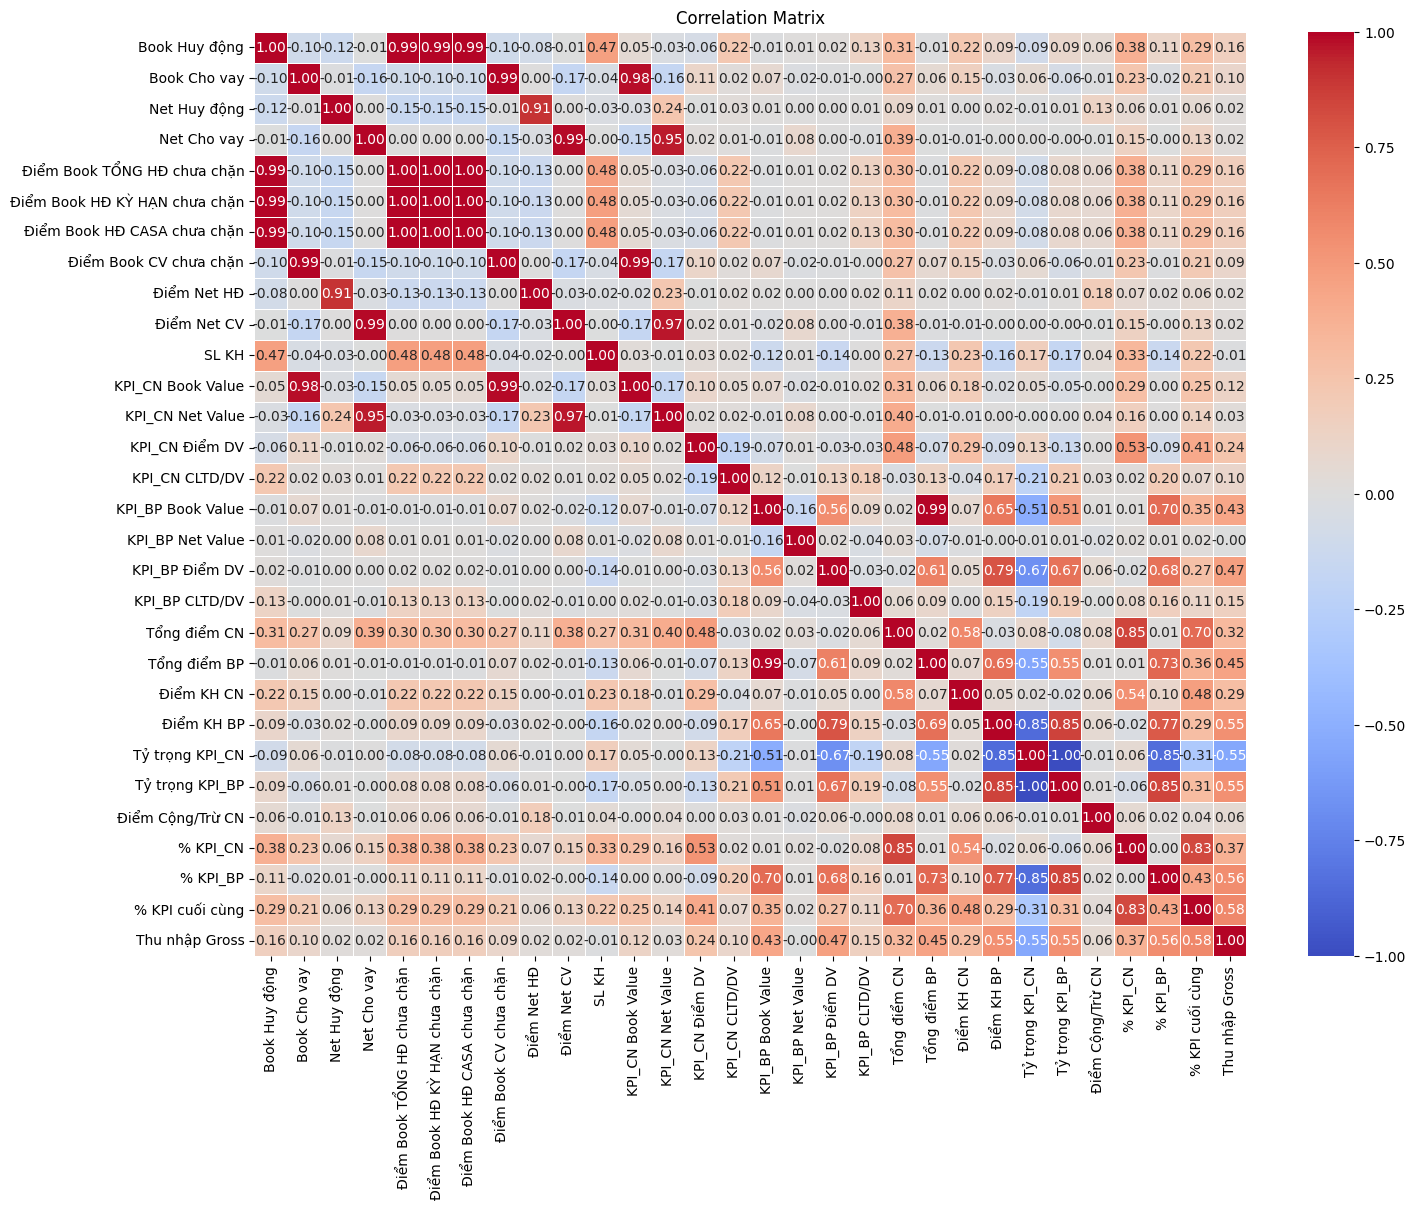

In [8]:
# Ma tr·∫≠n t∆∞∆°ng quan ban ƒë·∫ßu
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# X√≥a c√°c bi·∫øn t∆∞∆°ng quan qu√° cao > 0.9
df.drop(columns=['ƒêi·ªÉm Book T·ªîNG Hƒê ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book Hƒê K·ª≤ H·∫†N ch∆∞a ch·∫∑n', 'ƒêi·ªÉm Book Hƒê CASA ch∆∞a ch·∫∑n', 
                 'ƒêi·ªÉm Book CV ch∆∞a ch·∫∑n',             
                 'ƒêi·ªÉm Net Hƒê',                         
                 'ƒêi·ªÉm Net CV',                        
                 'KPI_CN Book Value',                   
                 'KPI_CN Net Value',   # Gi·ªØ l·∫°i 4 c·ªôt g·ªëc 'Book Huy ƒë·ªông', 'Book cho vay', ' Net Huy ƒë·ªông', 'Net Cho vay'
                 'T·ª∑ tr·ªçng KPI_BP'     # Gi·ªØ l·∫°i 1 c·ªôt g·ªëc 'T·ª∑ tr·ªçng KPI_CN'
                ], inplace=True)

# X√≥a c√°c bi·∫øn kh√¥ng t·ªìn t·∫°i khi tri·ªÉn khai
df.drop(columns=['T·ªïng ƒëi·ªÉm CN', 'T·ªïng ƒëi·ªÉm BP', 
                 '% KPI_CN', '% KPI_BP', 
                 'Thu nh·∫≠p Gross'
                ], inplace=True)

# X√≥a bi·∫øn thi·∫øu √Ω nghƒ©a - kho·∫£ng 90% gi√° tr·ªã = 0
df.drop(columns=['ƒêi·ªÉm C·ªông/Tr·ª´ CN'], inplace=True)

---
## **KI·ªÇM TRA TO√ÄN B·ªò**
- **MA TR·∫¨N T∆Ø∆†NG QUAN**
- **PH√ÇN PH·ªêI**
- **TH·ªêNG K√ä M√î T·∫¢**

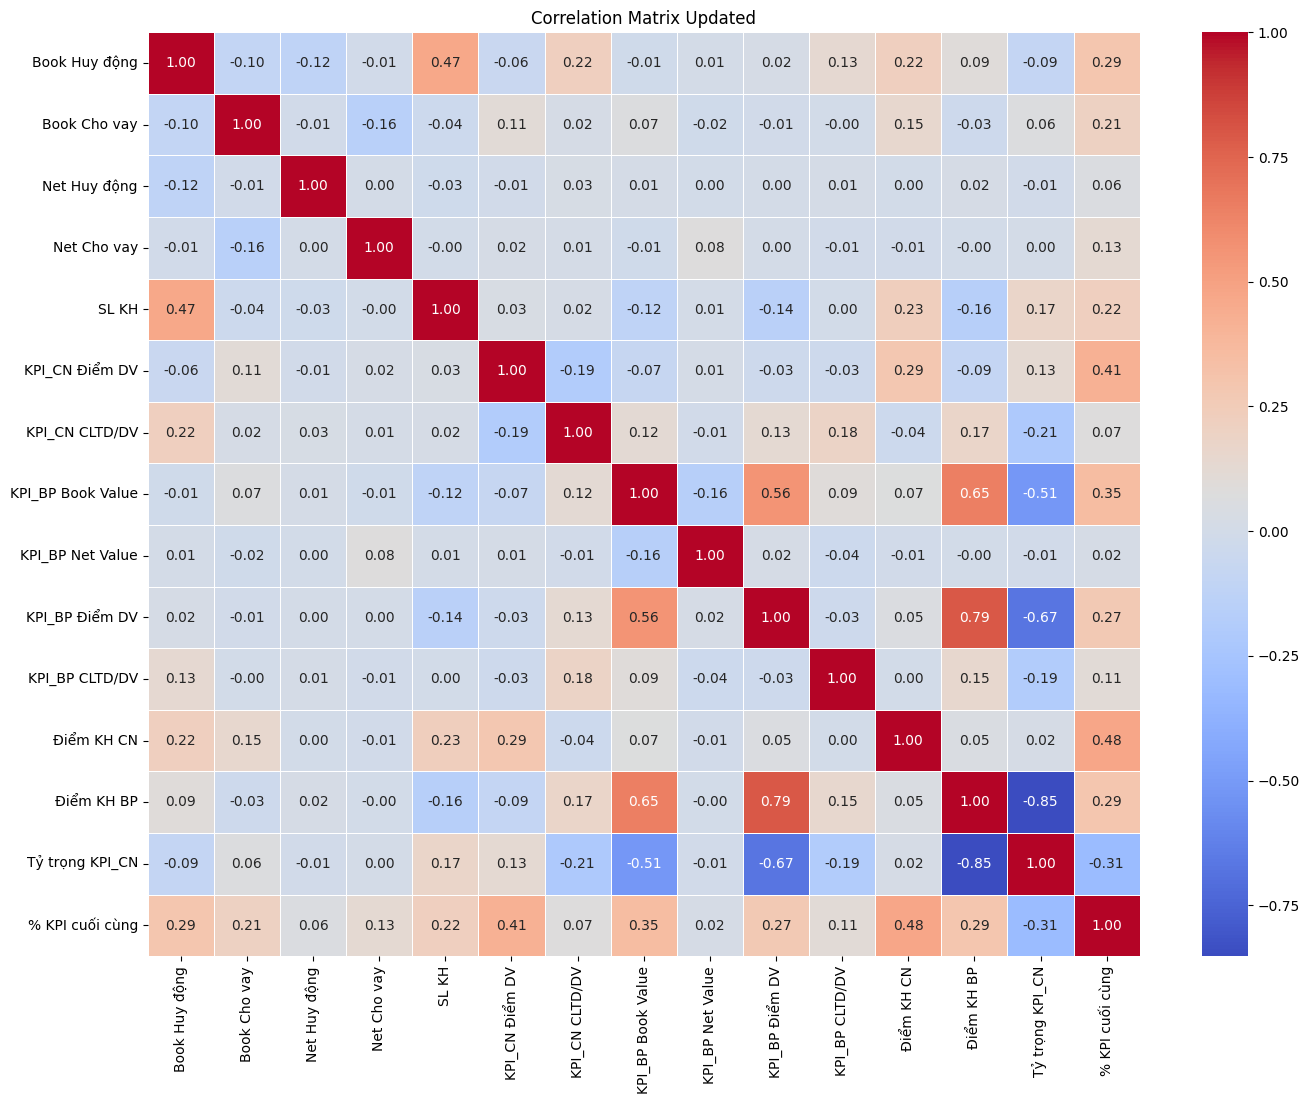

In [10]:
# Ma tr·∫≠n t∆∞∆°ng quan 2
df_numeric_2 = df.select_dtypes(include=[np.number])
corr_matrix_2 = df_numeric_2.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Updated')
plt.show()

In [11]:
cols_to_keep = [
    "Book Huy ƒë·ªông",       
    "Book Cho vay",
    "Net Huy ƒë·ªông",
    "Net Cho vay",
    "SL KH",
    "KPI_CN ƒêi·ªÉm DV",   # Comment ƒë·ªÉ x√≥a nhanh c√°c c·ªôt v√† th·ª≠ nghi·ªám
    "KPI_CN CLTD/DV",
    "KPI_BP Book Value",
    "KPI_BP Net Value",
    "KPI_BP ƒêi·ªÉm DV",
    "KPI_BP CLTD/DV",
    "ƒêi·ªÉm KH CN",
    "ƒêi·ªÉm KH BP",
    "T·ª∑ tr·ªçng KPI_CN",
    "% KPI cu·ªëi c√πng",  # Target
]

# T·∫°o dataframe m·ªõi t·ª´ c√°c c·ªôt ƒë√£ ch·ªçn
df1 = df[cols_to_keep].copy()

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import pandas as pd

# 1. T√°ch X, y
X = df1.drop(columns=["% KPI cu·ªëi c√πng"])
y = df1["% KPI cu·ªëi c√πng"]

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit m√¥ h√¨nh XGB
model_1 = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.07,
    max_depth=7,
    n_estimators=250,
    subsample=0.8,
    random_state=42,
    verbosity=0
)
model_1.fit(X_train, y_train)
y_pred_model_1 = model_1.predict(X_test)

# Fit m√¥ h√¨nh LGBM v·ªõi quantile
model_2 = LGBMRegressor(
    objective="quantile",
    alpha=0.5,
    learning_rate=0.15,
    n_estimators=250,
    max_depth=7,
    min_child_samples=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbose=-1
)
model_2.fit(X_train, y_train)
y_pred_model_2 = model_2.predict(X_test)

# T·∫°o b·∫£ng k·∫øt qu·∫£
results = pd.DataFrame({
    "Model": ["Model 1", "Model 2"],
    "R¬≤ Test": [
        r2_score(y_test, y_pred_model_1),
        r2_score(y_test, y_pred_model_2),
    ],
    "MAE Test": [
        mean_absolute_error(y_test, y_pred_model_1),
        mean_absolute_error(y_test, y_pred_model_2),
    ],
    "RMSE Test": [
        root_mean_squared_error(y_test, y_pred_model_1),
        root_mean_squared_error(y_test, y_pred_model_2),
    ]
})
results

Model  R¬≤ Test  MAE Test  RMSE Test
0  Model 1   0.9719    0.0342     0.0676
1  Model 2   0.9605    0.0408     0.0801

In [13]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import randint, uniform
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split

from mapie.metrics import (regression_coverage_score,
                           regression_mean_width_score)
from mapie.regression import MapieQuantileRegressor, MapieRegressor
from mapie.subsample import Subsample

def sort_y_values(y_test, y_pred, y_pis):
    """
    Sorting the dataset in order to make plots using the fill_between function.
    """
    indices = np.argsort(y_test)
    y_test_sorted = np.array(y_test)[indices]
    y_pred_sorted = y_pred[indices]
    y_lower_bound = y_pis[:, 0, 0][indices]
    y_upper_bound = y_pis[:, 1, 0][indices]
    return y_test_sorted, y_pred_sorted, y_lower_bound, y_upper_bound


def plot_prediction_intervals(
    title,
    axs,
    y_test_sorted,
    y_pred_sorted,
    lower_bound,
    upper_bound,
    coverage,
    width,
    num_plots_idx
):
    """
    Plot of the prediction intervals for each different conformal
    method.
    """
    axs.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    lower_bound_ = np.take(lower_bound, num_plots_idx)
    y_pred_sorted_ = np.take(y_pred_sorted, num_plots_idx)
    y_test_sorted_ = np.take(y_test_sorted, num_plots_idx)

    error = y_pred_sorted_-lower_bound_

    warning1 = y_test_sorted_ > y_pred_sorted_+error
    warning2 = y_test_sorted_ < y_pred_sorted_-error
    warnings = warning1 + warning2
    axs.errorbar(
        y_test_sorted_[~warnings],
        y_pred_sorted_[~warnings],
        yerr=np.abs(error[~warnings]),
        capsize=5, marker="o", elinewidth=2, linewidth=0,
        label="Inside prediction interval"
        )
    axs.errorbar(
        y_test_sorted_[warnings],
        y_pred_sorted_[warnings],
        yerr=np.abs(error[warnings]),
        capsize=5, marker="o", elinewidth=2, linewidth=0, color="red",
        label="Outside prediction interval"
        )
    axs.scatter(
        y_test_sorted_[warnings],
        y_test_sorted_[warnings],
        marker="*", color="green",
        label="True value"
    )
    axs.set_xlabel("TRUE")
    axs.set_ylabel("PREDICT")
    ab = AnnotationBbox(
        TextArea(
            f"Coverage: {np.round(coverage, round_to)}\n"
            + f"Interval width: {np.round(width, round_to)}"
        ),
        xy=(np.min(y_test_sorted_)*3, np.max(y_pred_sorted_+error)*0.95),
        )
    lims = [
        np.min([axs.get_xlim(), axs.get_ylim()]),  # min of both axes
        np.max([axs.get_xlim(), axs.get_ylim()]),  # max of both axes
    ]
    axs.plot(lims, lims, '--', alpha=0.75, color="black", label="x=y")
    axs.add_artist(ab)
    axs.set_title(title, fontweight='bold')

---

In [14]:
random_state = 42
alpha_test_for_all_model = 0.05
estimator = model_2

---

In [15]:
STRATEGIES = {
    "naive": {"method": "naive"},
    "cv_plus": {"method": "plus", "cv": 10},
    "jackknife_plus_ab": {"method": "plus", "cv": Subsample(n_resamplings=50)},
    "cqr": {"method": "quantile", "cv": "split", "alpha": alpha_test_for_all_model},
}
y_pred, y_pis = {}, {}
y_test_sorted, y_pred_sorted, lower_bound, upper_bound = {}, {}, {}, {}
coverage, width = {}, {}
for strategy, params in STRATEGIES.items():
    if strategy == "cqr":
        mapie = MapieQuantileRegressor(
            estimator, 
            **params
        )
        mapie.fit(
            X_train,
            y_train,
            calib_size=0.3,
            random_state=random_state
        )
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test)
    else:
        mapie = MapieRegressor(
            estimator,
            test_size=0.3,
            random_state=random_state,
            **params
        )
        mapie.fit(
            X_train,
            y_train
        )
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test, alpha=alpha_test_for_all_model)
    (
        y_test_sorted[strategy],
        y_pred_sorted[strategy],
        lower_bound[strategy],
        upper_bound[strategy]
    ) = sort_y_values(y_test, y_pred[strategy], y_pis[strategy])
    coverage[strategy] = regression_coverage_score(
        y_test,
        y_pis[strategy][:, 0, 0],
        y_pis[strategy][:, 1, 0]
        )
    width[strategy] = regression_mean_width_score(
        y_pis[strategy][:, 0, 0],
        y_pis[strategy][:, 1, 0]
        )

INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.


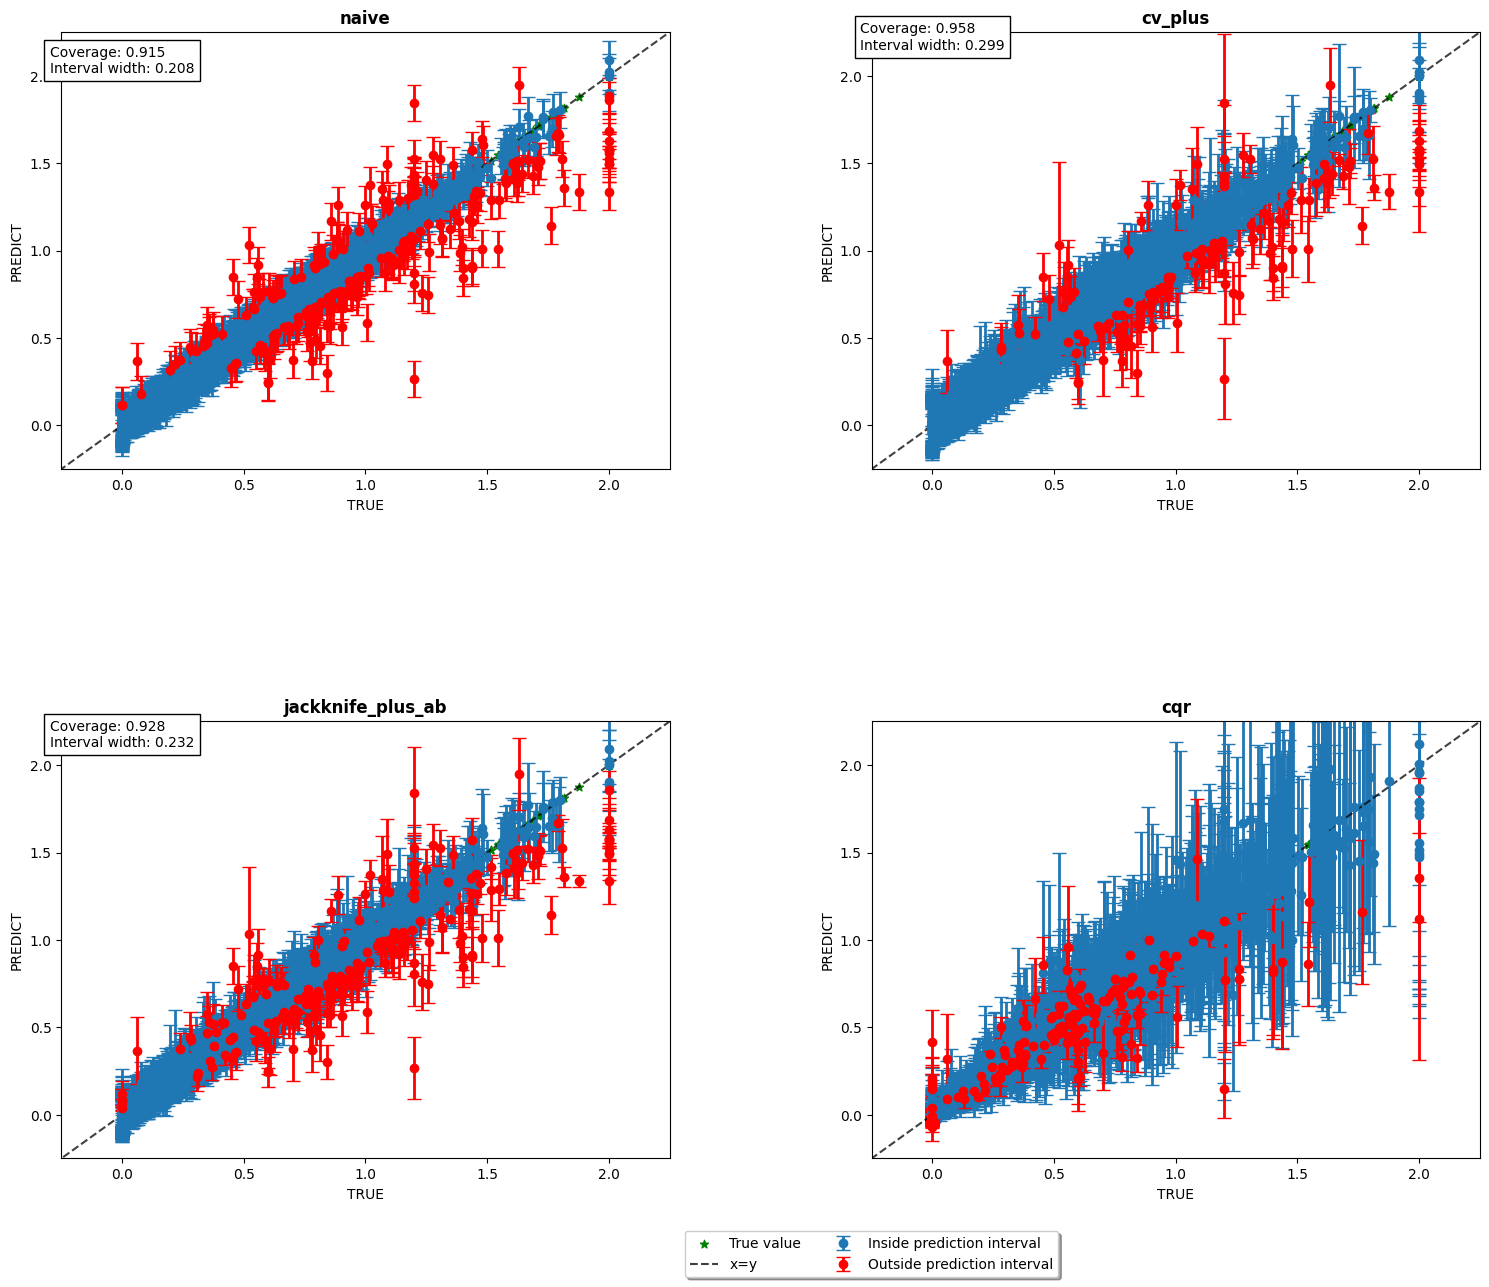

In [16]:
rng = np.random.default_rng(random_state)
round_to = 3
warnings.filterwarnings("ignore")

perc_obs_plot = 1
num_plots = rng.choice(
    len(y_test), int(perc_obs_plot*len(y_test)), replace=False
    )
fig, axs = plt.subplots(2, 2, figsize=(15, 13))
coords = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]

for strategy, coord in zip(STRATEGIES.keys(), coords):
    plot_prediction_intervals(
        strategy,
        coord,
        y_test_sorted[strategy],
        y_pred_sorted[strategy],
        lower_bound[strategy],
        upper_bound[strategy],
        coverage[strategy],
        width[strategy],
        num_plots
    )
    # B√≥ c·ªë ƒë·ªãnh scale x, y
    coord.set_xlim(-0.25, 2.25)
    coord.set_ylim(-0.25, 2.25)

# Legend d√πng chung
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(_, []) for _ in zip(*lines_labels)]
plt.legend(
    lines[:4], labels[:4],
    loc='upper center',
    bbox_to_anchor=(0, -0.15),
    fancybox=True,
    shadow=True,
    ncol=2
)

plt.tight_layout()
plt.show()


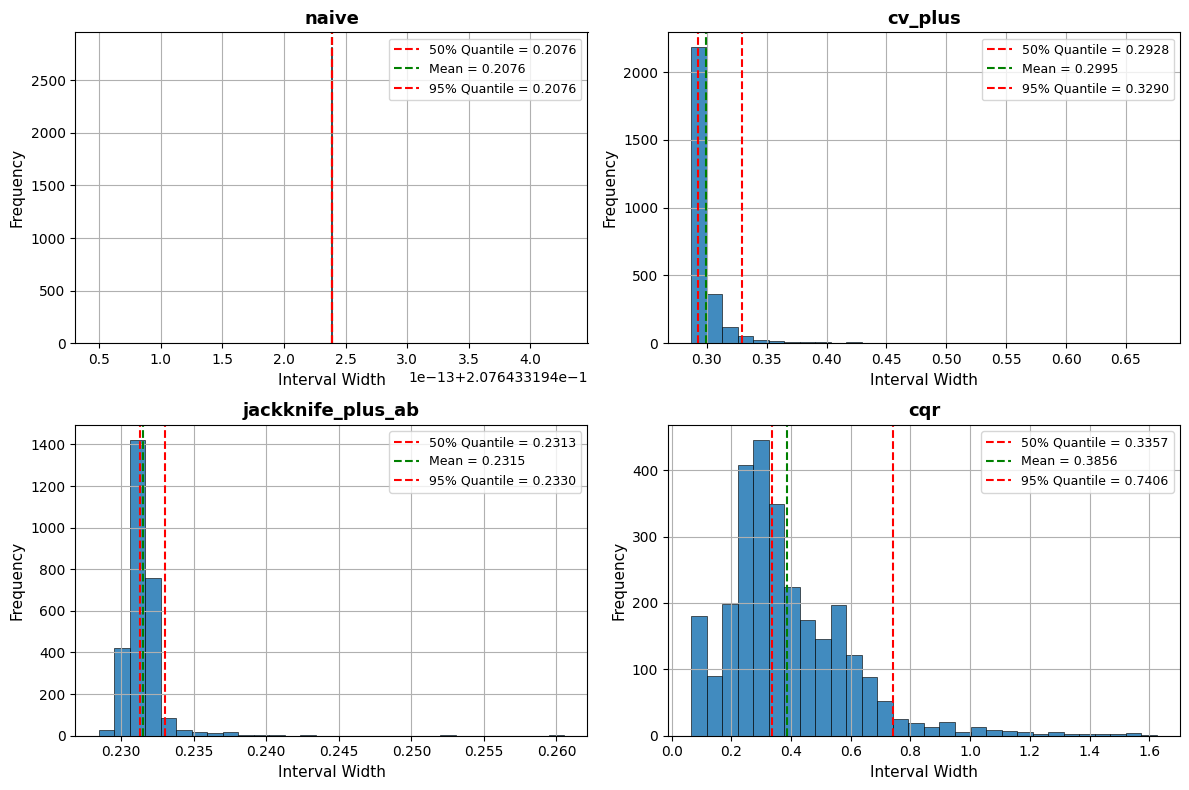

In [17]:
def plot_width_distribution(ax, strat):
    widths = upper_bound[strat] - lower_bound[strat]

    # Th·ªëng k√™ c∆° b·∫£n
    w1 = np.quantile(widths, 0.5)
    w2 = np.quantile(widths, 0.95)
    w3 = np.mean(widths)
    std_width = np.std(widths)

    # X·ª≠ l√Ω bins: n·∫øu std qu√° nh·ªè th√¨ d√πng 1 bin duy nh·∫•t
    if std_width < 1e-6:
        bins = 1
    else:
        bins = 30

    # Plot histogram
    ax.hist(widths, bins=bins, edgecolor='black', alpha=0.85, linewidth=0.5)

    # ƒê∆∞·ªùng k·∫ª th·ªëng k√™
    l1 = ax.axvline(w1, color='red', linestyle='--', linewidth=1.5, label=f"50% Quantile = {w1:.4f}")
    l3 = ax.axvline(w3, color='green', linestyle='--', linewidth=1.5, label=f"Mean = {w3:.4f}")
    l2 = ax.axvline(w2, color='red', linestyle='--', linewidth=1.5, label=f"95% Quantile = {w2:.4f}")
    ax.legend(handles=[l1, l3, l2], loc="upper right", fontsize=9)

    # Decor
    ax.set_title(strat, fontsize=13, fontweight='bold')
    ax.set_xlabel("Interval Width", fontsize=11)
    ax.set_ylabel("Frequency", fontsize=11)
    ax.grid(True)
    
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for idx, strat in enumerate(STRATEGIES.keys()):
    plot_width_distribution(axs[idx], strat)

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# T·∫°o list ƒë·ªÉ ch·ª©a t·ª´ng d√≤ng d·ªØ li·ªáu
results = []

# Duy·ªát qua t·ª´ng chi·∫øn l∆∞·ª£c ƒë√£ train
for strat in STRATEGIES.keys():
    # T√≠nh c√°c gi√° tr·ªã c·∫ßn l∆∞u
    coverage_val = coverage[strat]
    mean_width_val = width[strat]
    
    # Widths t·ª´ng ƒëi·ªÉm
    widths = upper_bound[strat] - lower_bound[strat]
    
    w1 = np.quantile(widths, 0.5)   # 50% quantile
    w3 = np.quantile(widths, 0.95)  # 95% quantile
    w2 = np.mean(widths)           # Mean width

    # Append v√†o danh s√°ch
    results.append({
        "Strategy": strat,
        "Coverage": coverage_val,
        "Mean Width (api)": mean_width_val,
        "Quantile 50%": w1,
        "Mean Width (manual)": w2,
        "Quantile 95%": w3
    })

# Chuy·ªÉn th√†nh dataframe
df_results = pd.DataFrame(results)

# Tu·ª≥ ch·ªânh format hi·ªÉn th·ªã n·∫øu mu·ªën
df_results = df_results.round(4)

# In ra
df_results

Strategy  Coverage  Mean Width (api)  Quantile 50%  \
0              naive    0.9151            0.2076        0.2076   
1            cv_plus    0.9581            0.2995        0.2928   
2  jackknife_plus_ab    0.9275            0.2315        0.2313   
3                cqr    0.9552            0.3856        0.3357   

   Mean Width (manual)  Quantile 95%  
0               0.2076        0.2076  
1               0.2995        0.3290  
2               0.2315        0.2330  
3               0.3856        0.7406

---
# **FINDING STRAT**
---
### GI·ªú M√Ä N√ìI STRAT N√ÄO T·ªêT NH·∫§T TH√å R·∫§T KH√ì
### TA R√öT V·ªÄ B√ÄI TO√ÅN THEO NHU C·∫¶U KH√ÅCH H√ÄNG, GI·∫¢ S·ª¨ MONG MU·ªêN MEAN WIDTH HO·∫∂C Q 50% WIDTH < M·ª®C C·ª§ TH·ªÇ
### FIT MAPIE CHO 3 STRAT CH√çNH L√Ä NAIVE, PLUS, CQR T·∫†I M·ªåI ALPHA T·ª™ 0 - 0.5 (CHO NH·∫∏ M√ÅY) ƒê·ªÇ T√åM RA COVERAGE CAO NH·∫§T 


In [19]:
# C·∫•u h√¨nh quantile c·∫ßn t√≠nh
W_Q_1 = 0.5
W_Q_2 = 0.95

w_q_1_label = f"q{int(W_Q_1 * 100)}_width"
w_q_2_label = f"q{int(W_Q_2 * 100)}_width"

alpha_range = np.arange(0.01, 0.51, 0.01)

In [20]:
# --- NAIVE STRATEGY ---
mapie_naive = MapieRegressor(
    estimator=model_2,
    method="naive",
    random_state=42
)
mapie_naive.fit(X_train, y_train)

_, y_pis_naive_all = mapie_naive.predict(X_test, alpha=alpha_range)  # (n_samples, 2, n_alphas)

results_naive = []
for i, alpha in enumerate(alpha_range):
    y_lower_n = y_pis_naive_all[:, 0, i]
    y_upper_n = y_pis_naive_all[:, 1, i]
    widths_n = y_upper_n - y_lower_n

    cov_n = regression_coverage_score(y_test, y_lower_n, y_upper_n)
    mean_w_n = regression_mean_width_score(y_lower_n, y_upper_n)
    q1_n = np.quantile(widths_n, W_Q_1)
    q2_n = np.quantile(widths_n, W_Q_2)

    results_naive.append({
        "alpha": alpha,
        "coverage": cov_n,
        "mean_width": mean_w_n,
        w_q_1_label: q1_n,
        w_q_2_label: q2_n
    })

df_naive_alpha = pd.DataFrame(results_naive)

In [21]:
df_naive_alpha.head(5)

alpha  coverage  mean_width  q50_width  q95_width
0 0.0100    0.9812      0.5391     0.5391     0.5391
1 0.0200    0.9645      0.3583     0.3583     0.3583
2 0.0300    0.9474      0.2805     0.2805     0.2805
3 0.0400    0.9325      0.2370     0.2370     0.2370
4 0.0500    0.9151      0.2076     0.2076     0.2076

In [22]:
mapie = MapieRegressor(
    estimator=model_2,
    method="plus",
    cv=10,
    random_state=42
)
mapie.fit(X_train, y_train)

_, y_pis_all = mapie.predict(X_test, alpha=alpha_range)
# y_pis_all c√≥ shape (n_samples, 2, n_alphas)

results_plus = []
for i, alpha in enumerate(alpha_range):
    y_lower = y_pis_all[:, 0, i]
    y_upper = y_pis_all[:, 1, i]
    widths = y_upper - y_lower

    cov = regression_coverage_score(y_test, y_lower, y_upper)
    mean_w = regression_mean_width_score(y_lower, y_upper)
    q1 = np.quantile(widths, W_Q_1)
    q2 = np.quantile(widths, W_Q_2)

    results_plus.append({
        "alpha": alpha,
        "coverage": cov,
        "mean_width": mean_w,
        w_q_1_label: q1,
        w_q_2_label: q2
    })

df_plus_alpha = pd.DataFrame(results_plus)


In [23]:
df_plus_alpha.head(30)

alpha  coverage  mean_width  q50_width  q95_width
0  0.0100    0.9904      0.6999     0.6981     0.7179
1  0.0200    0.9819      0.4900     0.4857     0.5104
2  0.0300    0.9734      0.3905     0.3844     0.4198
3  0.0400    0.9652      0.3370     0.3310     0.3647
4  0.0500    0.9581      0.2995     0.2928     0.3290
5  0.0600    0.9524      0.2701     0.2631     0.3021
6  0.0700    0.9485      0.2464     0.2389     0.2818
7  0.0800    0.9435      0.2273     0.2193     0.2655
8  0.0900    0.9350      0.2114     0.2027     0.2517
9  0.1000    0.9293      0.1981     0.1889     0.2410
10 0.1100    0.9229      0.1866     0.1773     0.2319
11 0.1200    0.9155      0.1766     0.1671     0.2234
12 0.1300    0.9105      0.1680     0.1584     0.2162
13 0.1400    0.9027      0.1603     0.1507     0.2098
14 0.1500    0.8980      0.1533     0.1439     0.2040
15 0.1600    0.8920      0.1471     0.1377     0.1980
16 0.1700    0.8860      0.1414     0.1320     0.1915
17 0.1800    0.8817      0.1362     0.1269     0.1845
18 0.1900    0.8764      0.1313     0.1222     0.1794
19 0.2000    0.8710      0.1268     0.1178     0.1737
20 0.2100    0.8643      0.1226     0.1138     0.1690
21 0.2200    0.8600      0.1186     0.1099     0.1644
22 0.2300    0.8544      0.1149     0.1064     0.1594
23 0.2400    0.8490      0.1113     0.1030     0.1553
24 0.2500    0.8437      0.1078     0.0999     0.1509
25 0.2600    0.8352      0.1045     0.0969     0.1471
26 0.2700    0.8309      0.1014     0.0941     0.1430
27 0.2800    0.8259      0.0984     0.0913     0.1393
28 0.2900    0.8192      0.0955     0.0887     0.1350
29 0.3000    0.8107      0.0927     0.0862     0.1302

In [24]:
# -------------------------------
# Ph·∫ßn CQR: Fit nhi·ªÅu l·∫ßn theo alpha (v√¨ ph·∫£i truy·ªÅn alpha ngay l√∫c kh·ªüi t·∫°o model)
# -------------------------------
results_cqr = []

for alpha in alpha_range:
    mapie_cqr = MapieQuantileRegressor(
        estimator=model_2,
        method="quantile",
        cv="split",
        alpha=alpha
    )
    mapie_cqr.fit(X_train, y_train, calib_size=0.3, random_state=42)
    _, y_pis_cqr = mapie_cqr.predict(X_test)

    y_lower_cqr = y_pis_cqr[:, 0, 0]
    y_upper_cqr = y_pis_cqr[:, 1, 0]
    widths_cqr = y_upper_cqr - y_lower_cqr

    cov_cqr = regression_coverage_score(y_test, y_lower_cqr, y_upper_cqr)
    mean_w_cqr = regression_mean_width_score(y_lower_cqr, y_upper_cqr)
    q1_cqr = np.quantile(widths_cqr, W_Q_1)
    q2_cqr = np.quantile(widths_cqr, W_Q_2)

    results_cqr.append({
        "alpha": alpha,
        "coverage": cov_cqr,
        "mean_width": mean_w_cqr,
        w_q_1_label: q1_cqr,
        w_q_2_label: q2_cqr
    })

df_cqr_alpha = pd.DataFrame(results_cqr)

INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-

In [25]:
df_cqr_alpha.head(30)

alpha  coverage  mean_width  q50_width  q95_width
0  0.0100    0.9915      0.8433     0.7798     1.3099
1  0.0200    0.9819      0.6068     0.5648     1.0271
2  0.0300    0.9723      0.5026     0.4511     0.9274
3  0.0400    0.9659      0.4205     0.3724     0.8133
4  0.0500    0.9552      0.3856     0.3357     0.7406
5  0.0600    0.9428      0.3452     0.3060     0.6977
6  0.0700    0.9403      0.3219     0.2799     0.6450
7  0.0800    0.9261      0.2933     0.2507     0.6214
8  0.0900    0.9119      0.2704     0.2320     0.5869
9  0.1000    0.9055      0.2557     0.2161     0.5717
10 0.1100    0.8966      0.2367     0.1981     0.5515
11 0.1200    0.8920      0.2266     0.1813     0.5365
12 0.1300    0.8767      0.2133     0.1740     0.5049
13 0.1400    0.8774      0.2004     0.1623     0.4832
14 0.1500    0.8615      0.1974     0.1565     0.4838
15 0.1600    0.8522      0.1855     0.1487     0.4741
16 0.1700    0.8419      0.1829     0.1438     0.4608
17 0.1800    0.8295      0.1729     0.1347     0.4310
18 0.1900    0.8316      0.1706     0.1288     0.4422
19 0.2000    0.8249      0.1627     0.1261     0.4192
20 0.2100    0.8131      0.1518     0.1148     0.4185
21 0.2200    0.7964      0.1496     0.1176     0.4054
22 0.2300    0.7748      0.1386     0.1037     0.3790
23 0.2400    0.7663      0.1386     0.1062     0.3867
24 0.2500    0.7560      0.1320     0.0983     0.3782
25 0.2600    0.7488      0.1280     0.0969     0.3564
26 0.2700    0.7520      0.1262     0.0972     0.3561
27 0.2800    0.7304      0.1172     0.0850     0.3373
28 0.2900    0.7190      0.1177     0.0871     0.3323
29 0.3000    0.7236      0.1123     0.0848     0.3112

---
# NH·∫¨N X√âT
### V·ªÄ COVERAGE: T·∫†I M·ªåI M·ª®C ALPHA TH√å THEO TH·ª® T·ª∞ "NAIVE, PLUS, CQR" TA TH·∫§Y T√çNH CH·∫§T COVERAGE KH√Å ƒê·∫∂C BI·ªÜT T∆Ø∆†NG ·ª®NG L√Ä "H·ª§T, TH·ª™A, CHU·∫®N X·∫§P X·ªà" SO V·ªöI ƒê·ªò TIN C·∫¨Y MONG MU·ªêN 
### TUY NHI√äN B·∫¢N CH·∫§T V·∫™N CH·ªà L√Ä S·ª∞ ƒê√ÅNH ƒê·ªîI WIDTH (DO THU·∫¨T TO√ÅN KH√ÅC NHAU) THEO TH·ª® T·ª∞: 
- ### NAIVE: C·ª®NG, H·∫∏P, CH·∫ÆC CH·∫ÆN H·ª§T
- ### PLUS: H∆†I H∆†I LINH HO·∫†T (NHI·ªÄU TR∆Ø·ªúNG H·ª¢P V·ª™A, R·ªòNG)
- ### CQR: LINH HO·∫†T CAO (C√ÇN B·∫∞NG NH·∫§T, C√ì H·∫∏P QU√Å V√Ä C≈®NG C√ì R·ªòNG QU√Å)"
---
### B∆Ø·ªöC TI·∫æP THEO L√Ä CH·ªåN RA STRAT PH√ô H·ª¢P NH·∫§T V·ªöI MONG MU·ªêN KH√ÅCH H√ÄNG
- ### WIDTH MAX ACCEPT: L√Ä SAI S·ªê 1 PH√çA MONG MU·ªêN / ƒê∆Ø·ª¢C CHO PH√âP
- ### METRIC CHOIE: ƒê·ªÇ N·∫æU MU·ªêN THAY TH√ÄNH MEAN HAY Q50 HAY Q95 TH√å CH·ªàNH CHO NHANH
---

In [26]:
# ---- STEP 1: ƒê·∫∑t ng∆∞·ª°ng sai s·ªë t·ªëi ƒëa (theo b√†i to√°n KPI) ----
width_max_acceptable = 0.1        # ƒê·ªïi t√πy b√†i to√°n
metric_choice = "q50_width"       # ƒê·ªïi t√πy b√†i to√°n "mean_width" ho·∫∑c "q95_width"

# ---- STEP 2: Duy·ªát qua 3 DataFrame ƒë·ªÉ ch·ªçn d√≤ng t·ªët nh·∫•t v·ªõi ng∆∞·ª°ng ƒë√£ cho ----
df_dict = {
    "naive": df_naive_alpha,
    "cv_plus": df_plus_alpha,
    "cqr": df_cqr_alpha
}

selected_rows = []

for name, df in df_dict.items():
    best_row = df.iloc[(df[metric_choice] - width_max_acceptable).abs().argmin()]
    best_row_dict = best_row.to_dict()
    best_row_dict["strategy"] = name
    selected_rows.append(best_row_dict)

# ---- STEP 3: T·ªïng h·ª£p l·∫°i th√†nh b·∫£ng k·∫øt qu·∫£ ----
df_selected = pd.DataFrame(selected_rows)[["strategy", "alpha", "coverage", "mean_width", "q50_width", "q95_width"]]

def highlight_metric_and_best_coverage(df, metric_choice):
    def highlight_cells(val):
        return 'font-weight: bold; background-color: #3CB371' if val == df["coverage"].max() else ''
    
    styles = df.style.applymap(highlight_cells, subset=["coverage"])
    styles = styles.set_table_styles([
        {'selector': f'th.col{df.columns.get_loc(metric_choice)}',
         'props': [('background-color', '#4682B4')]}
    ])
    return styles

# Hi·ªÉn th·ªã b·∫£ng ƒë·∫πp
display(highlight_metric_and_best_coverage(df_selected, metric_choice))

# ---- STEP 4: In k·∫øt lu·∫≠n b·∫±ng ng√¥n ng·ªØ t·ª± nhi√™n ----
best_strategy = df_selected.loc[df_selected["coverage"].idxmax()]
print("üîé K·∫æT LU·∫¨N")
print(f"‚û°Ô∏è V·ªõi c√°ch ch·ªçn max width acceptable = {width_max_acceptable} theo h·ªá metric '{metric_choice}'")
print(f"‚úÖ Chi·∫øn l∆∞·ª£c t·ªët nh·∫•t l√† **{best_strategy['strategy']}** v·ªõi coverage ƒë·∫°t **{best_strategy['coverage']:.4f}**.")

üîé K·∫æT LU·∫¨N
‚û°Ô∏è V·ªõi c√°ch ch·ªçn max width acceptable = 0.1 theo h·ªá metric 'q50_width'
‚úÖ Chi·∫øn l∆∞·ª£c t·ªët nh·∫•t l√† **cv_plus** v·ªõi coverage ƒë·∫°t **0.8437**.


In [27]:
# STEP 5: Fit l·∫°i 3 m√¥ h√¨nh theo alpha ƒë√£ ch·ªçn
refit_preds = {}
refit_intervals = {}

for _, row in df_selected.iterrows():
    strat = row["strategy"]
    alpha = row["alpha"]

    if strat == "cqr":
        model = MapieQuantileRegressor(
            estimator=model_2,
            method="quantile",
            cv="split",
            alpha=alpha
        )
        model.fit(X_train, y_train, calib_size=0.3, random_state=42)
        y_pred, y_pis = model.predict(X_test)
    else:
        model = MapieRegressor(
            estimator=model_2,
            method=strat if strat == "naive" else "plus",
            cv=10 if strat == "cv_plus" else None,
            test_size=0.3,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred, y_pis = model.predict(X_test, alpha=alpha)

    refit_preds[strat] = y_pred
    refit_intervals[strat] = y_pis
    
refit_y_test_sorted = {}
refit_y_pred_sorted = {}
refit_lower_bound = {}
refit_upper_bound = {}
refit_coverage = {}
refit_width = {}

for strat in refit_preds:
    y_pred = refit_preds[strat]
    y_pis = refit_intervals[strat]

    y_lower = y_pis[:, 0, 0]
    y_upper = y_pis[:, 1, 0]

    y_test_sorted_, y_pred_sorted_, y_lower_, y_upper_ = sort_y_values(y_test, y_pred, y_pis)

    refit_y_test_sorted[strat] = y_test_sorted_
    refit_y_pred_sorted[strat] = y_pred_sorted_
    refit_lower_bound[strat] = y_lower_
    refit_upper_bound[strat] = y_upper_
    refit_coverage[strat] = regression_coverage_score(y_test, y_lower, y_upper)
    refit_width[strat] = regression_mean_width_score(y_lower, y_upper)

INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.


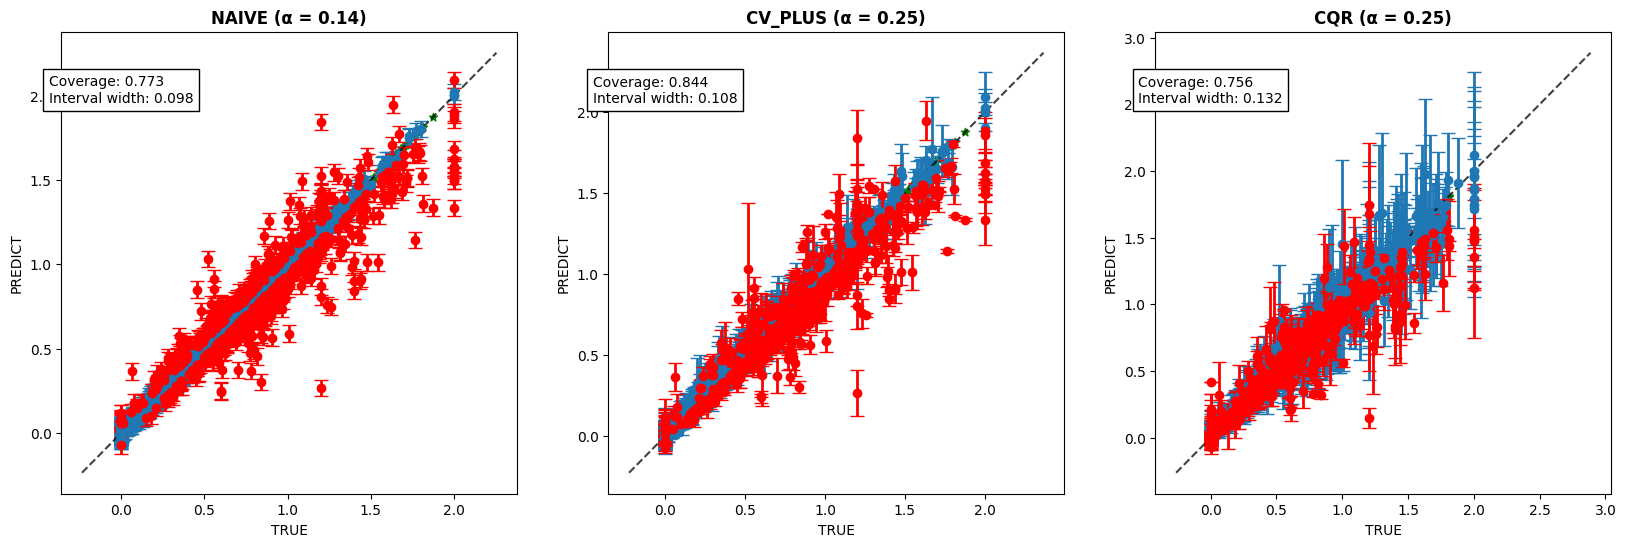

In [28]:
rng = np.random.default_rng(random_state)
round_to = 3
warnings.filterwarnings("ignore")

perc_obs_plot = 1
num_plots = rng.choice(len(y_test), int(perc_obs_plot * len(y_test)), replace=False)

# 1 row x 3 cols = 3 plot (v√¨ m√¨nh ch·ªâ gi·ªØ l·∫°i 3 strat)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for idx, (strat, ax) in enumerate(zip(refit_preds.keys(), axs)):
    plot_prediction_intervals(
        title=f"{strat.upper()} (Œ± = {df_selected.loc[df_selected['strategy'] == strat, 'alpha'].values[0]:.2f})",
        axs=ax,
        y_test_sorted=refit_y_test_sorted[strat],
        y_pred_sorted=refit_y_pred_sorted[strat],
        lower_bound=refit_lower_bound[strat],
        upper_bound=refit_upper_bound[strat],
        coverage=refit_coverage[strat],
        width=refit_width[strat],
        num_plots_idx=num_plots
    )

plt.show()

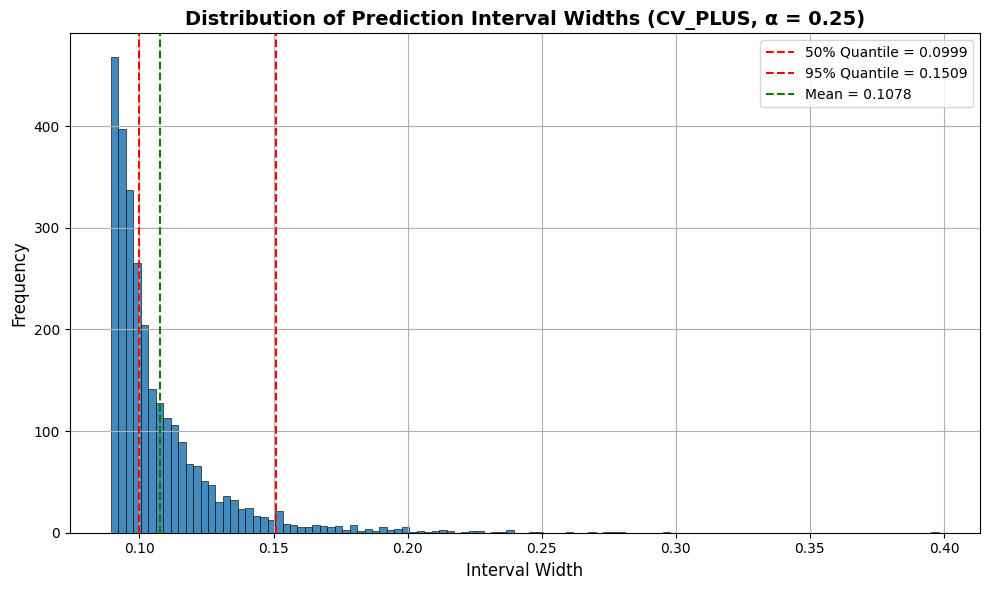

In [29]:
# L·∫•y l·∫°i th√¥ng tin chi·∫øn l∆∞·ª£c t·ªët nh·∫•t
best_strat = best_strategy["strategy"]
best_alpha = best_strategy["alpha"]

# Truy c·∫≠p d·ªØ li·ªáu refit ƒë√£ ƒë∆∞·ª£c t√≠nh t·ª´ tr∆∞·ªõc
y_lower_best = refit_lower_bound[best_strat]
y_upper_best = refit_upper_bound[best_strat]
widths_best = y_upper_best - y_lower_best

# T√≠nh c√°c th·ªëng k√™ m√¥ t·∫£
w1 = np.quantile(widths_best, 0.5)
w2 = np.quantile(widths_best, 0.95)
w3 = np.mean(widths_best)

# V·∫Ω histogram
plt.figure(figsize=(10, 6))
plt.hist(widths_best, bins="auto", edgecolor='black', alpha=0.85, linewidth=0.5)

# C√°c ƒë∆∞·ªùng tham chi·∫øu
plt.axvline(w1, color='red', linestyle='--', linewidth=1.5, label=f"50% Quantile = {w1:.4f}")
plt.axvline(w2, color='red', linestyle='--', linewidth=1.5, label=f"95% Quantile = {w2:.4f}")
plt.axvline(w3, color='green', linestyle='--', linewidth=1.5, label=f"Mean = {w3:.4f}")

# Ti√™u ƒë·ªÅ v√† ch√∫ th√≠ch
plt.title(f"Distribution of Prediction Interval Widths ({best_strat.upper()}, Œ± = {best_alpha:.2f})", fontsize=14, fontweight='bold')
plt.xlabel("Interval Width", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()